# Ask for help: Is my code can calculate the correct answer for the hierarchey with the formula below?

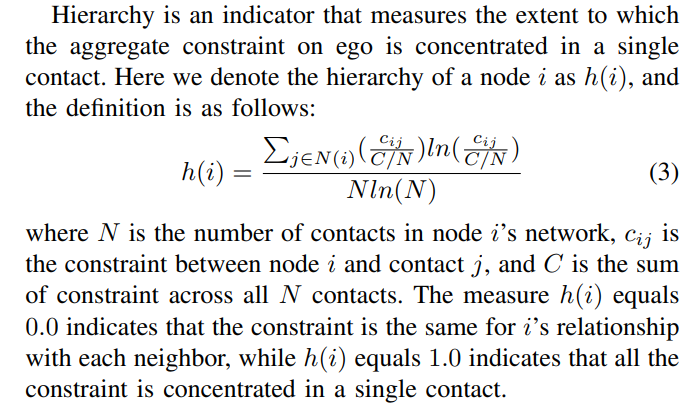

In [ ]:
 """
    This is the main code that I want to ask.
     def hierarchey(self,node_i,sum_constraint):
        #print(np.log([2.73]))
        all_connected_nodes = nx.neighbors(self.G,node_i) # list of connector
        len_all_connected_nodes = 0
        for i in all_connected_nodes:
            len_all_connected_nodes += 1
        numerator = 0 
        print("总链接：",len_all_connected_nodes)
        all_connected_nodes = nx.neighbors(self.G,node_i)
        for node_j in all_connected_nodes:
            num_partA = (nx.local_constraint(self.G,node_i,node_j))/(sum_constraint/len_all_connected_nodes)
            #print(num_partA)
            num_partB = np.log([(nx.local_constraint(self.G,node_i,node_j))/(sum_constraint/len_all_connected_nodes)])
            #print(num_partB)
            #print(num_partA*num_partB)
            numerator += (num_partA*num_partB)
        denominator = len_all_connected_nodes*np.log([len_all_connected_nodes])
        #print("分母partb：",np.log([len_all_connected_nodes]))
        #print("分数：",numerator)
        #print("分母：",denominator)
        if numerator == denominator:
            hierarchey = 1
        elif denominator == 0 or numerator==0:
            hierarchey = 0
        else:
            hierarchey = numerator/denominator
            
        #print(num_partA)
        #print(num_partB)
        print("网络层级hierarchey：",hierarchey)
        return hierarchey
"""

## Run for the first time execute only

In [ ]:
#check the python version must greater than 3.0
!python -V

#install

%pip install networkx==2.6.3
%pip install numpy
%pip install pandas
%pip install matplotlib

# then restart.
# after restart no need to execute this block
#prerequest to graph widget


## Always run code below after restart or modified

In [30]:
%matplotlib
%matplotlib widget

##code start
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for approx
from networkx.algorithms import approximation as approx
# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);
        
class graph:
    def __init__(self,path,gtype=0,year=None):
        self.G=0
        self.year = year
        self.store=[]
        self.store_with_weights = []
        self.authors=[]
        self.commentors=[]
        self.path = path
        #gtype= 0(normal Graph),1 (directed graph), 2(multi graph)
        self.gtype = gtype
        self.open_file()
        self.create()
        
        
    def open_file(self):
        self.content = 0
        with open(self.path, 'r', encoding="utf-8") as file:
            self.content = file.read()
            file.close()
        
    def create(self):
        if self.gtype == 0:
            self.G = nx.Graph()
        elif self.gtype == 1:
            self.G = nx.DiGraph()
        elif self.gtype == 2:
            self.G = nx.MultiDiGraph()
        for i in self.content.split("\n"):
            if "commenter" in i:
                pass
            elif i != "":
                c = i.split("\",")
                #print(c)
                c1 = c[0][1:]
                #print(c1)
                c2 = c[1][1:len(c[1])-1]
                un_addnode1 = [c1,f"self.G.add_node(\"{c1}\",role=\"author\")"]
                un_addnode2 = [c2,f"self.G.add_node(\"{c2}\",role=\"commentor\")"]
                (self.authors).append(un_addnode1)
                (self.commentors).append(un_addnode2)
                #print(c2)
                #d = float(c[2])
                #print(d)
                #if d != -1:
                #    un_x = [f"from \"{c1}\" to \"{c2}\"",f"self.G.add_edge(\"{c1}\", \"{c2}\", weight= {d}, c1 = \"{c2}\")"]
                #    self.store += [un_x]
                un_addedge = [f"author \"{c1}\" comment \"{c2}\"",f"self.G.add_edge(\"{c1}\", \"{c2}\",weight= 1)"]
                un_addedge_weights = [c1,c2]
                self.store += [un_addedge]
                self.store_with_weights += [un_addedge_weights]
                
    def delete_edges_and_nodes(self):
        edges = [i for i in (self.G).edges]
        nodes = [i for i in (self.G).nodes]
        #print(nodes)
        #print(edges)
        (self.G).remove_edges_from(edges)
        (self.G).remove_edges_from(nodes)
        
    def draw(self):
        self.authors=list(tuple(self.authors))
        self.commentors=list(tuple(self.commentors))
        self.checked_commentors = []
        for i in self.commentors:
            #print(i[0])
            un_k = 0
            for j in self.authors:
                if i[0] == j[0]:
                    un_k = 1
                    break
            if un_k == 0:
                self.checked_commentors.append(i)
        self.commentors = self.checked_commentors 
        edges = [i for i in (self.G).edges]
        nodes = [i for i in (self.G).nodes]
        if edges != "" or nodes != "":
            self.delete_edges_and_nodes()
        for i in self.authors:
            eval(i[1])
        for i in self.commentors:
            eval(i[1])
        for i in self.store:
            #print(i[1])
            eval(i[1])
        self.total_nodes = len(self.G.nodes)
        self.total_edges = len(self.G.edges)
        
            
    def draw_with_weights(self):
        self.authors=list(tuple(self.authors))
        self.commentors=list(tuple(self.commentors))
        self.checked_commentors = []
        for i in self.commentors:
            #print(i[0])
            un_k = 0
            for j in self.authors:
                if i[0] == j[0]:
                    un_k = 1
                    break
            if un_k == 0:
                self.checked_commentors.append(i)
        self.commentors = self.checked_commentors 
        edges = [i for i in (self.G).edges]
        nodes = [i for i in (self.G).nodes]
        if edges != "" or nodes != "":
            self.delete_edges_and_nodes()
        for i in self.authors:
            eval(i[1])
        for i in self.commentors:
            eval(i[1])
        default_weight = 1
        for nodes in self.store_with_weights:
            #print(nodes)
            n0 = nodes[0]
            n1 = nodes[1]
            if self.G.has_edge(n0,n1):   
                #print(n0,n1)
                if self.gtype != 2:
                    self.G[n0][n1]['weight'] += default_weight
                else:
                    self.G[n0][n1][0]['weight'] += default_weight
            else:
                self.G.add_edge(n0,n1, weight=default_weight)
        self.total_nodes = len(self.G.nodes)
        self.total_edges = len(self.G.edges)
        
    
    def only_draw_locations(self,location):
        #print(location)
        edges = [i for i in (self.G).edges]
        nodes = [i for i in (self.G).nodes]
        if edges != "" or nodes != "":
            self.delete_edges_and_nodes()
        times = len(location)
        x_t_1 = 0
        
        while x_t_1 < times:
            for i in self.store:
                #print(i[0])
                #print(location in i[0])
                if location[x_t_1] in i[0]:
                    #print(i[1])
                    eval(i[1])
            x_t_1 += 1
            
    def draw_path(self,location):
        #print(location)
        edges = [i for i in (self.G).edges]
        nodes = [i for i in (self.G).nodes]
        if edges != "" or nodes != "":
            self.delete_edges_and_nodes()
        times = len(location)
        x_t_1 = 0
        
        while x_t_1 < times-1:
            for i in self.store:
                #print(i[0])
                #print(location in i[0])
                if (location[x_t_1] in i[0]) and (location[x_t_1+1] in i[0]):
                    eval(i[1])
                    break
            x_t_1 += 1
           
        
        
    def show(self):
        #e1 = [(u, v) for (u, v, d) in G.edges(data=True) if ((d["c1"] == "Putrajaya")and(d["weight"] > 0))]
        e1 = [(u, v) for (u, v, d) in self.G.edges(data=True)]
             
        pos = nx.spring_layout(self.G)  # positions for all nodes - seed for reproducibility

        # edge weight labels
        edge_labels = nx.get_edge_attributes(self.G, "weight")
        
        self.ax = plt.figure().gca()
        plt.title(f"User Network")
        if self.year != None:
            plt.title(f"{self.year} User Network")
        plt.axis("off")
        plt.tight_layout()
        
        # nodes
        nodelist_author = [(u) for (u, v) in self.G.nodes(data=True) if (v["role"]=="author")]
        nodelist_commentor = [(u) for (u, v) in self.G.nodes(data=True) if (v["role"]=="commentor")]
        nx.draw_networkx_nodes(self.G, pos, node_size=100, ax= self.ax,nodelist=nodelist_commentor,node_color='b')
        nx.draw_networkx_nodes(self.G, pos, node_size=100, ax= self.ax,nodelist=nodelist_author,node_color='r')
        # edges
        nx.draw_networkx_edges(self.G, pos, edgelist=e1, width=0.2, style="dashed",edge_color="b", ax= self.ax)

        # node labels
        nx.draw_networkx_labels(self.G, pos, font_size=10, ax= self.ax)
        nx.draw_networkx_labels(self.G, pos, font_size=10, ax= self.ax)
         # edges labels
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels, ax= self.ax)
        
        #print(self.G.nodes(data=True))
        #print(self.G.edges(data=True))
        plt.show()
        
    def print_other(self):
        #print(self.G.edges(data=True))
        nodelist_author = [(u) for (u, v) in self.G.nodes(data=True) if (v["role"]=="author")]
        nodelist_commentor = [(u) for (u, v) in self.G.nodes(data=True) if (v["role"]=="commentor")]
        print(f"总用户/节点数:{len(nodelist_author)+len(nodelist_commentor)}")
        print(f"连接数:{len(self.G.edges)}")
        print("网络效率 :")
        print("a.	网络密度:")
        density = nx.density(self.G)
        print(f"网络密度: {density}")
        print("b.	网络可达性:")
        try:
            diameter = nx.diameter(self.G)
            print(f"直径指标: {diameter}")
        except:
            print(f"没有全图直径指标：图标有处无连接。")
            un_i1 = 1
            for C in (self.G.subgraph(c).copy() for c in nx.connected_components(self.G)):
                print(f"第{un_i1}部分直径指标: {nx.diameter(C)}")
                un_i1+=1
        try:
            average_shortest_path_length = nx.average_shortest_path_length(self.G)
            print(f"平均路径长度: {average_shortest_path_length}")
        except:
            print(f"没有全图平均路径长度：图标有处无连接。")
            un_i1 = 1
            for C in (self.G.subgraph(c).copy() for c in nx.connected_components(self.G)):
                print(f"第{un_i1}部分平均路径长度: {nx.average_shortest_path_length(C)}")
                un_i1+=1
        
        #transitivity = nx.transitivity(self.G)
        #print("传递性:",transitivity)
        
        #average_node_connectivity = nx.average_node_connectivity(self.G)
        #print("连通性:",average_node_connectivity)
        
        print("网络中心性:")
        degree_centrality = nx.degree_centrality(self.G)
        highest_centrality = max(degree_centrality, key=degree_centrality.get)
        value_highest_centrality = degree_centrality[highest_centrality]
        highest_centrality += " ("+str(value_highest_centrality)+")"
        print("Highest Centrality by 点度中心性:",highest_centrality)
        
        closeness_centrality = nx.closeness_centrality(self.G)
        highest_centrality = max(closeness_centrality, key=closeness_centrality.get)
        value_highest_centrality = closeness_centrality[highest_centrality]
        highest_centrality += " ("+str(value_highest_centrality)+")"
        print("Highest Centrality by 接近中心性:",highest_centrality)
        betweenness_centrality = nx.betweenness_centrality(self.G)
        highest_centrality = max(betweenness_centrality, key=betweenness_centrality.get)
        value_highest_centrality = betweenness_centrality[highest_centrality]
        highest_centrality += " ("+str(value_highest_centrality)+")"
        print("Highest Centrality by 中介中心性:",highest_centrality)
        #triangles = nx.triangles(self.G)
        #print(f"triangles: {triangles}")
        #transitivity = nx.transitivity(self.G)
        #print(f"transitivity: {transitivity}")
        #clustering = nx.clustering(self.G)
        #print(clustering)
        average_clustering = nx.average_clustering(self.G)
        
        print("\n小世界特征：高平均聚类系数和短平均路径长度。")
        print("\n平均聚类系数： 数目越大，人之间的关系越强。因为拥有更多共同朋友。")
        print(f"平均聚类系数: {average_clustering}")
        
        import community
        import itertools
        from networkx.algorithms.community.centrality import girvan_newman
        comp = girvan_newman(self.G)
        k = 6
        for communities in itertools.islice(comp, k):
            print(tuple(sorted(c) for c in communities))

        
        #print(community.modularity(self.G,community.best_partition(self.G)))
        
        #bipartite = nx.bipartite.is_bipartite(self.G)
        #print(f"Bipartite: {bipartite}")
        #node_connectivity = approx.node_connectivity(self.G)
        #print(f"node_connectivity: {node_connectivity}")
        
        #communicability = nx.communicability(self.G)
        #print(f"communicability: {communicability}")
        
    def directed_print_other(self):
        """
        笨手笨脚的木子
        #print(self.hierachy("1", 0.333))
        
        print("网络中心性:")
        degree_centrality = nx.degree_centrality(self.G)
        highest_centrality = max(degree_centrality, key=degree_centrality.get)
        value_highest_centrality = degree_centrality[highest_centrality]
        highest_centrality += " ("+str(value_highest_centrality)+")"
        print("Highest Centrality by 点度中心性:",highest_centrality)
        degree_centrality = nx.in_degree_centrality(self.G)
        highest_centrality = max(degree_centrality, key=degree_centrality.get)
        value_highest_centrality = degree_centrality[highest_centrality]
        highest_centrality += " ("+str(value_highest_centrality)+")"
        print("Highest Centrality by 入点度中心性:",highest_centrality)
        degree_centrality = nx.out_degree_centrality(self.G)
        highest_centrality = max(degree_centrality, key=degree_centrality.get)
        value_highest_centrality = degree_centrality[highest_centrality]
        highest_centrality += " ("+str(value_highest_centrality)+")"
        print("Highest Centrality by 出点度中心性:",highest_centrality)
        """
        "有效规模 网络效率 限制度 网络层级"
        effective_size = nx.effective_size(self.G)
        highest_effective_size = max(effective_size, key=effective_size.get)
        value_highest_effective_size = effective_size[highest_effective_size]
        highest_effective_size += " ("+str(value_highest_effective_size)+")"
        print("highest_effective_size 有效规模:",highest_effective_size)
        efficiency = {n: v / self.G.degree(n) for n, v in effective_size.items()}
        highest_efficiency = max(efficiency, key=efficiency.get)
        value_highest_efficiency = efficiency[highest_efficiency]
        highest_efficiency += " ("+str(value_highest_efficiency)+")"
        print("highest_efficiency 网路效率:",highest_efficiency)
       
        constraint = nx.constraint(self.G)
        #print(constraint)
        highest_constraint = max(constraint, key=constraint.get)
        value_highest_constraint = constraint[highest_constraint]
        highest_constraint+= " ("+str(value_highest_constraint)+")"
        print("highest constraint 限制度:",highest_constraint)
        return constraint

    def check_straight_connect(self,node):
        node_list = [(u) for (u, v) in self.G.nodes(data=True)]
        count = 0
        
        for nodes in node_list:
            #print(nodes)
            n1 = nodes
            if n1 != node:
                if self.G.has_edge(node,n1):   
                    count += 1
        for nodes in node_list:
            #print(nodes)
            n1 = nodes
            if n1 != node:
                if self.G.has_edge(n1,node):   
                    count += 1
        if count != 0:
            return count
        else:
            return "没有链接"
    
    
    def return_weight(self,start,end,edge):
        return edge["weight"]
    
    def the_shortest_path(self,start,end):
        k = nx.shortest_path((self.G),start,end,weight=self.return_weight)
        for i in k:
            if i != end:
                print(i,end=" -> ")
            else:
                print(i)
                
    def all_the_shortest_path_pass_more_than_two(self):
        k = nx.shortest_path((self.G),weight=self.return_weight)
        for i,j in k.items():
            for i_1,j_1 in j.items():
                if len(j_1) > 2:
                    print(j_1)
                    
    def hierarchey(self,node_i,sum_constraint):
        #print(np.log([2.73]))
        all_connected_nodes = nx.neighbors(self.G,node_i) # list of connector
        len_all_connected_nodes = 0
        for i in all_connected_nodes:
            len_all_connected_nodes += 1
        numerator = 0 
        #print("all connected nodes 总链接：",len_all_connected_nodes)
        all_connected_nodes = nx.neighbors(self.G,node_i)
        for node_j in all_connected_nodes:
            num_partA = (nx.local_constraint(self.G,node_i,node_j))/(sum_constraint/len_all_connected_nodes)
            #print(num_partA)
            num_partB = np.log([(nx.local_constraint(self.G,node_i,node_j))/(sum_constraint/len_all_connected_nodes)])
            #print(num_partB)
            #print(num_partA*num_partB)
            numerator += (num_partA*num_partB)
        denominator = len_all_connected_nodes*np.log([len_all_connected_nodes])
        #print("分母partb：",np.log([len_all_connected_nodes]))
        #print("分数：",numerator)
        #print("分母：",denominator)
        if numerator == denominator:
            hierarchey = 1
        elif denominator == 0 or numerator==0:
            hierarchey = 0
        else:
            hierarchey = numerator/denominator
            
        #print(num_partA)
        #print(num_partB)
        #print("网络层级hierachy：",hierachy)
        return hierarchey
        
    def add_node(self,name,weight=None):
        self.G.add_node(name)

Using matplotlib backend: Qt5Agg


## Below is the testing code / data sets

In [32]:

test = "test_hierarchey.csv"
with open(test,'w') as file:
    file.write("\"3\",\"4\"")
    file.write("\n")
    file.write("\"14\",\"3\"")
    file.write("\n")
    file.write("\"9\",\"8\"")
    file.write("\n")
    file.write("\"1\",\"8\"")
    file.write("\n")
    file.write("\"11\",\"1\"")
    file.write("\n")
    file.write("\"11\",\"5\"")
    file.write("\n")
    file.write("\"2\",\"6\"")
    file.write("\n")
    file.write("\"6\",\"15\"")
    file.write("\n")
    file.write("\"8\",\"6\"")
    file.write("\n")
    file.write("\"13\",\"6\"")
    file.write("\n")
    file.write("\"13\",\"15\"")
    file.write("\n")    
    file.write("\"15\",\"1\"")
    file.write("\n")
    file.write("\"12\",\"7\"")
    file.write("\n")
    file.write("\"10\",\"11\"")
    file.write("\n")
    file.write("\"9\",\"7\"")
    file.close()
print("test")

test = "test_hierarchey.csv"
#full graph
a = graph(test,0,"test")
#a.draw()
a.draw_with_weights()
#a.show()
#a.print_other()
constraint = a.directed_print_other()
store = []
for i,j in constraint.items():
    store += [[int(i),f"node:\t {i},\t constraint: {j:0.3},\t\t hierarchey: {a.hierarchey(i,j)}"]]
for i in range(0,len(store)):
    for j in range(i+1,len(store)):
        if store[j][0] < store[i][0]:
            a = store[i]
            store[i] = store[j]
            store[j] = a
for i in store:
    print(i[1])

test
highest_effective_size 有效规模: 6 (3.5)
highest_efficiency 网路效率: 3 (1.0)
highest constraint 限制度: 14 (1.0)
node:	 1,	 constraint: 0.333,		 hierarchey: 0
node:	 2,	 constraint: 1.0,		 hierarchey: 1
node:	 3,	 constraint: 0.5,		 hierarchey: 0
node:	 4,	 constraint: 1.0,		 hierarchey: 1
node:	 5,	 constraint: 1.0,		 hierarchey: 1
node:	 6,	 constraint: 0.377,		 hierarchey: [0.04494432]
node:	 7,	 constraint: 0.5,		 hierarchey: 0
node:	 8,	 constraint: 0.333,		 hierarchey: 0
node:	 9,	 constraint: 0.5,		 hierarchey: 0
node:	 10,	 constraint: 1.0,		 hierarchey: 1
node:	 11,	 constraint: 0.333,		 hierarchey: 0
node:	 12,	 constraint: 1.0,		 hierarchey: 1
node:	 13,	 constraint: 0.835,		 hierarchey: [0.00299833]
node:	 14,	 constraint: 1.0,		 hierarchey: 1
node:	 15,	 constraint: 0.535,		 hierarchey: [0.04681379]


## Data processed by UCINET

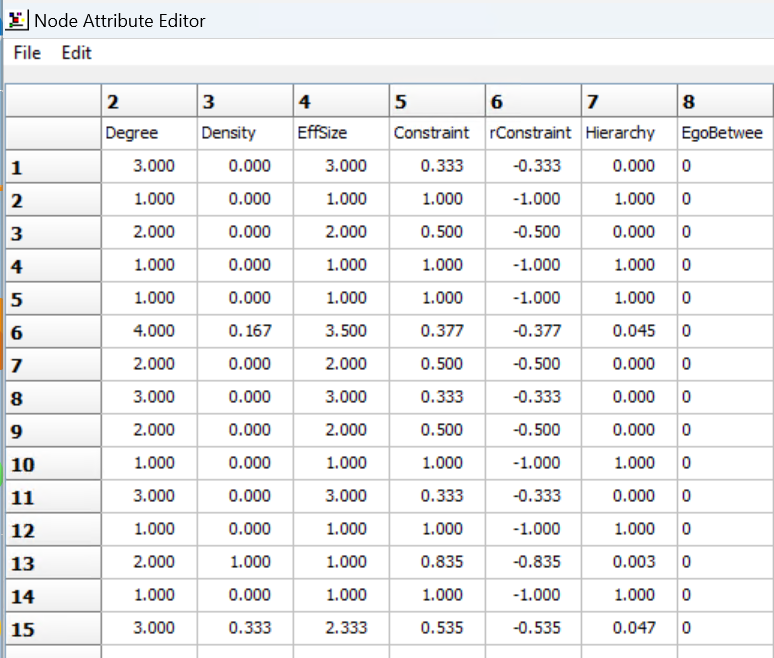

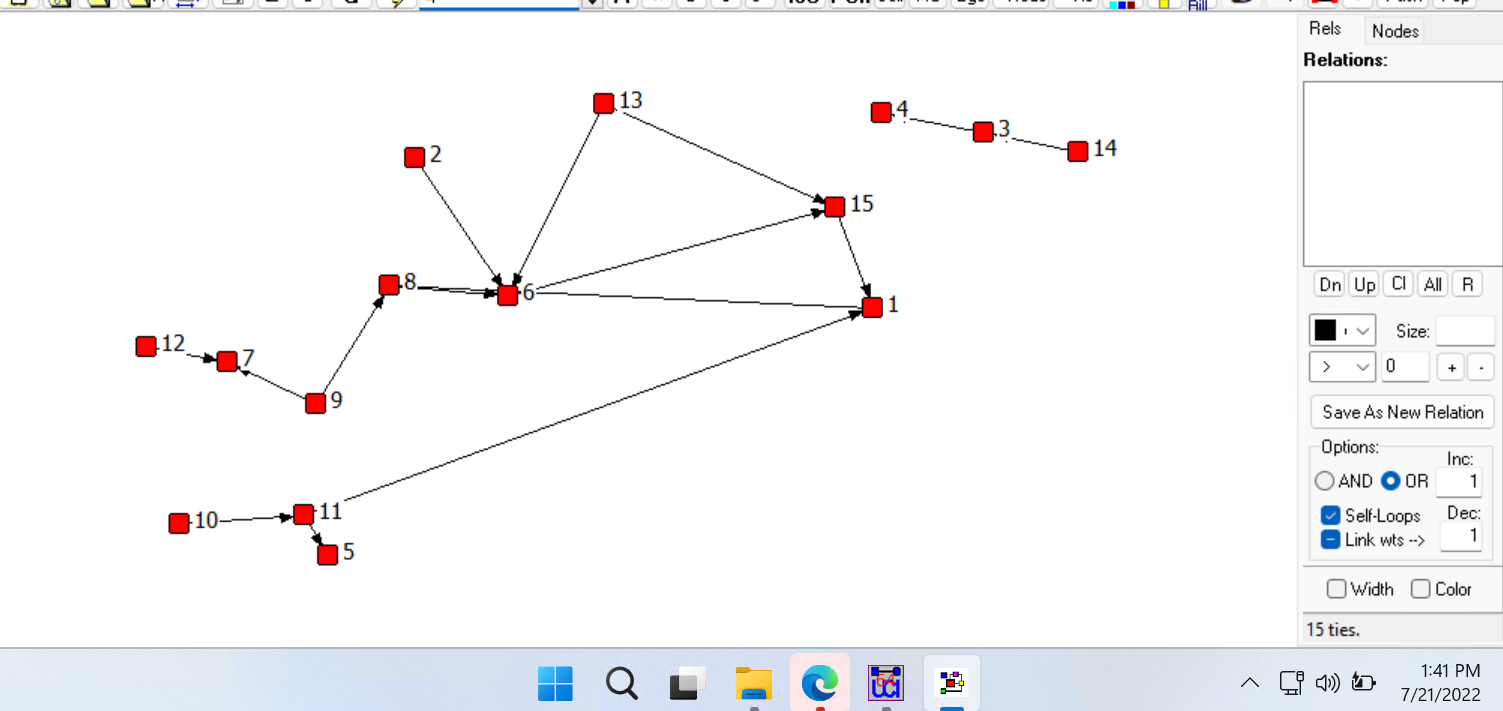

## Conclusion:
### Can this prove my calculation is the correct one? Any Suggestion? I am welcome and appreciate your help.
#

##### Author: KHOO ZHAO WEI
##### Contact: khoozhaowei@gmail.com